In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob, os

In [2]:
# get file with visit start times

direc = './dataFolders/Output/Step5_v3/'
files = glob.glob(direc + '*RawData*.csv')

In [3]:
n = []
isi = []

for f in files:
    df = pd.read_csv(f)
    a, b, c, _ = os.path.basename(f).split('_')
    name = a +'_'+ b + '_' + c
    ISI = df.In_Frame[1:].values - df.In_Frame[0:-1].values
    
    n.append(name)
    isi.append(ISI)

In [4]:
results = pd.DataFrame({'name': n, 
                       'interVisitInterval': isi})
new= results["name"].str.split("_", n = 1, expand = True)
results['lightLevel']=new[0]

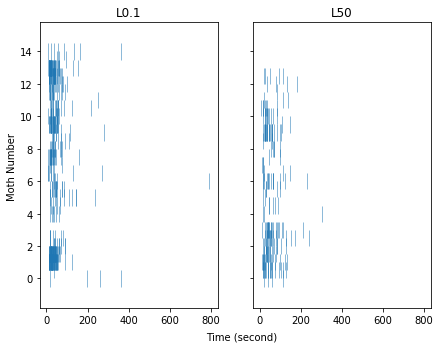

In [5]:
f, ax = plt.subplots(1,2,
                     sharex = True, sharey = True,
                    figsize = (7,7/4*3))
ax = ax.ravel()
i = 0
for lightlevel, subdf in results.groupby('lightLevel'):
    ax[i].eventplot(positions = subdf.interVisitInterval.values*1/100,
                      orientation = 'horizontal'
                     , linelengths = 1
                     , lineoffsets = 0.5
                         , linewidth = 0.5)
    ax[i].set_title(lightlevel)
    i+=1

f.text(0.525, 0.04, 'Time (second)', ha='center')
f.text(0.06, 0.5, 'Moth Number', va='center', rotation='vertical')
plt.savefig(r"./dataFolders/Output/Proboscis/Plots/" + 'InterVisitInterval.png')

# plot them as distributions

L0.1
377
L50
194


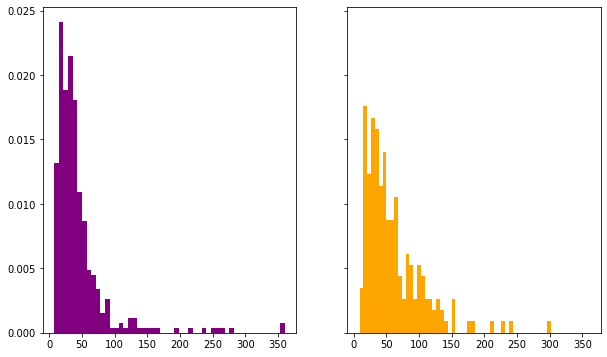

In [7]:
f, ax = plt.subplots(1,2, figsize = (10,6), sharex = True, sharey = True)
color = ['purple', 'orange']
i =0
for lightlevel, subdf in results.groupby('lightLevel'):
    print(lightlevel)
    flower_visit_intervals = subdf.interVisitInterval.values*1/100  
    
    all_interVisit = np.concatenate(flower_visit_intervals)
    print(len(all_interVisit))
    ax[i].hist(all_interVisit[all_interVisit<400], bins = 50, color = color[i], density = True)
    i+=1
    
plt.savefig('./dataFolders/Output/Proboscis/Plots/InterVisitInterval-histogram.png')

In [8]:
glow = np.concatenate(results.loc[results.lightLevel == 'L0.1','interVisitInterval'].values*1/100)
ghigh = np.concatenate(results.loc[results.lightLevel == 'L50','interVisitInterval'].values*1/100)

stats.ks_2samp(glow, ghigh)

Ks_2sampResult(statistic=0.23884984549755256, pvalue=6.503507289368216e-07)

In [9]:
len(glow), len(ghigh)

(377, 194)

## plot for paper SI

In [49]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [50]:
def eventplot(axis, values):
    ax0.eventplot(positions = subdf.interVisitInterval.values*1/100,
                      orientation = 'horizontal'
                     , linelengths = 1
                     , lineoffsets = 0.5
                         , linewidth = 0.5)

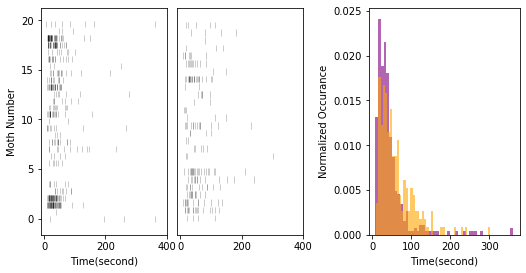

In [60]:
low_events = results.loc[results.lightLevel == 'L0.1','interVisitInterval'].values*1/100
high_events = results.loc[results.lightLevel == 'L50','interVisitInterval'].values*1/100

low = np.concatenate(low_events)
high = np.concatenate(high_events)

f = plt.figure(figsize = (7, 7/2))

ax0 = plt.axes([0, 0, 0.25, 0.9])
ax0.eventplot(positions = low_events,
              orientation = 'horizontal'
              ,linelengths = 0.6
              , lineoffsets = 0.7
              ,linewidth = 0.5,
             color = 'black',
             alpha = 0.4)
ax0.set_xlim([-10, 400])
ax0.set_ylabel('Moth Number')
ax0.set_xlabel('Time(second)', )

ax1 = plt.axes([0.27, 0, 0.25, 0.9])
ax1.eventplot(positions = high_events
              , orientation = 'horizontal'
              , linelengths = 0.6
              , lineoffsets = 0.7
              , linewidth = 0.5,
             color = 'black',
             alpha = 0.4)
ax1.set_yticks([])
ax1.set_xlim([-10, 400])

ax2 = plt.axes([0.65, 0, 0.3, 0.9])
ax2.hist(high[high<400], bins = 50, 
         color = 'orange',
         density = True,
        alpha = 0.6,
        zorder = 2)
ax2.hist(low[low<400], bins = 50, 
         color = 'purple', 
         density = True,
        alpha = 0.6,
        zorder = 1)
ax2.set_ylabel('Normalized Occurance')
ax2.set_xlabel('Time(second)')

plt.savefig('./dataFolders/Output/Step6_v4/Figure/FloralVisitation_SI.pdf',
           bbox_inches = 'tight')